# Анализ убытков приложения ProcrastinatePRO+
# Описание проекта

Мы маркетинговые аналитики развлекательного приложения Procrastinate Pro+.
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Цель проекта**

Необходимо выявить причины убыточной деятельности компании и сформировать рекомендации для отдела маркетинга.

**Задачи проекта**
- провести предобработку данных

- задать функции для расчёта и анализа LTV, ROI, удержания и конверсии.

- провести исследовательский анализ данных:
         - Cоставить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
         - Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.
         - Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
         - Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. 

- провести анализ данных по маркетингу:
         - Посчитать общую сумму расходов на маркетинг.
         - Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
         - Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
         - Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

- оценить окупаемость рекламы:
         - Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы.
         - Проанализировать окупаемость рекламы с помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
         - Проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей.
         - Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
         - Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
         - Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
         - Ответить на такие вопросы: Окупается ли реклама, направленная на привлечение пользователей в целом? Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы? Чем могут быть вызваны проблемы окупаемости?

- Выделить причины неэффективности привлечения пользователей. Сформулировать рекомендации для отдела маркетинга.

**Описание данных**

В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-подготовка-их-к-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и подготовка их к анализу</a></span><ul class="toc-item"><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Открываем-файлы-с-данными-и-изучаем-общую-информацию." data-toc-modified-id="Открываем-файлы-с-данными-и-изучаем-общую-информацию.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Открываем файлы с данными и изучаем общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функции для расчёта и анализа LTV, ROI, удержания и конверсии</a></span><ul class="toc-item"><li><span><a href="#Зададим-функции-для-вычисления-значений-метрик:" data-toc-modified-id="Зададим-функции-для-вычисления-значений-метрик:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Зададим функции для вычисления значений метрик:</a></span><ul class="toc-item"><li><span><a href="#get_profiles()-—-для-создания-профилей-пользователей" data-toc-modified-id="get_profiles()-—-для-создания-профилей-пользователей-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>get_profiles() — для создания профилей пользователей</a></span></li><li><span><a href="#get_retention()-—-для-подсчёта-Retention-Rate" data-toc-modified-id="get_retention()-—-для-подсчёта-Retention-Rate-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>get_retention() — для подсчёта Retention Rate</a></span></li><li><span><a href="#get_conversion()-—-для-подсчёта-конверсии" data-toc-modified-id="get_conversion()-—-для-подсчёта-конверсии-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>get_conversion() — для подсчёта конверсии</a></span></li><li><span><a href="#get_ltv()-—-для-подсчёта-LTV" data-toc-modified-id="get_ltv()-—-для-подсчёта-LTV-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>get_ltv() — для подсчёта LTV</a></span></li></ul></li><li><span><a href="#Зададим-функции-для-построения-графиков:" data-toc-modified-id="Зададим-функции-для-построения-графиков:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Зададим функции для построения графиков:</a></span><ul class="toc-item"><li><span><a href="#filter_data()-—-для-сглаживания-данных" data-toc-modified-id="filter_data()-—-для-сглаживания-данных-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>filter_data() — для сглаживания данных</a></span></li><li><span><a href="#plot_retention()-—-для-построения-графика-Retention-Rate" data-toc-modified-id="plot_retention()-—-для-построения-графика-Retention-Rate-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>plot_retention() — для построения графика Retention Rate</a></span></li><li><span><a href="#plot_conversion()-—-для-построения-графика-конверсии" data-toc-modified-id="plot_conversion()-—-для-построения-графика-конверсии-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>plot_conversion() — для построения графика конверсии</a></span></li><li><span><a href="#plot_ltv_roi-—-для-визуализации-LTV-и-ROI" data-toc-modified-id="plot_ltv_roi-—-для-визуализации-LTV-и-ROI-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>plot_ltv_roi — для визуализации LTV и ROI</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Составление-профилей-пользователей" data-toc-modified-id="Составление-профилей-пользователей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Составление профилей пользователей</a></span></li><li><span><a href="#Определение-минимальной-и-максимальной-даты-привлечения-пользователей" data-toc-modified-id="Определение-минимальной-и-максимальной-даты-привлечения-пользователей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Определение минимальной и максимальной даты привлечения пользователей</a></span></li><li><span><a href="#Анализ-пользователей-по-странам-(region),-устройствам-(device),-рекламным-источникам-привлечения(channel)" data-toc-modified-id="Анализ-пользователей-по-странам-(region),-устройствам-(device),-рекламным-источникам-привлечения(channel)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ пользователей по странам (region), устройствам (device), рекламным источникам привлечения(channel)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Расчет-общей-суммы-расходов-на-маркетинг" data-toc-modified-id="Расчет-общей-суммы-расходов-на-маркетинг-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расчет общей суммы расходов на маркетинг</a></span></li><li><span><a href="#Распределение-трат-по-рекламным-источникам" data-toc-modified-id="Распределение-трат-по-рекламным-источникам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Распределение трат по рекламным источникам</a></span></li><li><span><a href="#Визуализация-динамики-изменения-расходов-по-времени-(по-неделям-и-месяцам)-по-каждому-источнику" data-toc-modified-id="Визуализация-динамики-изменения-расходов-по-времени-(по-неделям-и-месяцам)-по-каждому-источнику-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Визуализация динамики изменения расходов по времени (по неделям и месяцам) по каждому источнику</a></span></li><li><span><a href="#Расчет-стоимости-привлечения-одного-пользователя-(CAC)-из-каждого-источника" data-toc-modified-id="Расчет-стоимости-привлечения-одного-пользователя-(CAC)-из-каждого-источника-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Расчет стоимости привлечения одного пользователя (CAC) из каждого источника</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка окупаемости рекламы</a></span><ul class="toc-item"><li><span><a href="#Анализ-общей-окупаемости-рекламы" data-toc-modified-id="Анализ-общей-окупаемости-рекламы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ общей окупаемости рекламы</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-устройствам-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-странам-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по странам</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-рекламным-каналам-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по рекламным каналам</a></span></li><li><span><a href="#Анализ-конверсии-и-удержания-пользователей-с-разбивкой-по-устройствам" data-toc-modified-id="Анализ-конверсии-и-удержания-пользователей-с-разбивкой-по-устройствам-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Анализ конверсии и удержания пользователей с разбивкой по устройствам</a></span></li><li><span><a href="#Анализ-конверсии-и-удержания-пользователей-с-разбивкой-по-странам" data-toc-modified-id="Анализ-конверсии-и-удержания-пользователей-с-разбивкой-по-странам-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Анализ конверсии и удержания пользователей с разбивкой по странам</a></span></li><li><span><a href="#Анализ-конверсии-и-удержания-пользователей-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Анализ-конверсии-и-удержания-пользователей-с-разбивкой-по-рекламным-каналам-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Анализ конверсии и удержания пользователей с разбивкой по рекламным каналам</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод-и-рекомендации" data-toc-modified-id="Общий-вывод-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод и рекомендации</a></span><ul class="toc-item"><li><span><a href="#Рекомендации-для-отдела-маркетинга:" data-toc-modified-id="Рекомендации-для-отдела-маркетинга:-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Рекомендации для отдела маркетинга:</a></span></li></ul></li></ul></div>

## Загрузка данных и подготовка их к анализу

### Подключение библиотек

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt

### Открываем файлы с данными и изучаем общую информацию. 

In [7]:
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [9]:
visits.duplicated().sum()

0

Файл visits хранит лог сервера с информацией о посещениях сайта.

Всего 6 колонок, 30901 строк.

Пропуски отсутствуют, дубликатов нет.

Необходимо заменить названия столбцов (привести к нижнему регистру, добавить нижние подчеркивания между словами в названии), преобразовать тип данных в столбцах с датами начала и окончания сессии - привести их к формату datetime.

In [11]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [13]:
orders.duplicated().sum()

0

Файл orders хранит информацию о заказах. 

В файле 3 колонки и 40212 строк. 

Пропуски отсутствуют. Дубликатов нет. 

Необходимо заменить названия столбцов (привести к нижнему регистру, добавить нижние подчеркивания между словами в названии), привести тип данных в столбце с датой и временем покупки к формату datetime.

In [15]:
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [17]:
costs.duplicated().sum()

0

Файл costs хранит информацию о расходах на рекламу. 

В файле 3 колонки и 1800 строк. 

Пропуски отсутствуют. Дубликатов нет. 

Необходимо заменить названия столбцов (привести к нижнему регистру), привести тип данных в столбце с датой проведения рекламной компании к формату datetime.

#### Предобработка данных

Приводим названия столбцов в файлах к нижнему регистру:

In [21]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

Меняем названия столбцов (добавляем нижние подчеркивания):

In [23]:
visits = visits.rename(columns=\
                       {'user id': 'user_id', 
                        'session start': 'session_start', 
                        'session end': 'session_end'})

In [24]:
orders = orders.rename(columns=\
                       {'user id': 'user_id',
                        'event dt': 'event_dt'})

Измненяем тип данных в столбцах с датами:

In [26]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [27]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [28]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Предобработка данных заверешена.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии

#### Зададим функции для вычисления значений метрик:

##### get_profiles() — для создания профилей пользователей

In [33]:
# функция для создания пользовательских профилей get_profiles()

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period('M').dt.to_timestamp()

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


##### get_retention() — для подсчёта Retention Rate

In [35]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### get_conversion() — для подсчёта конверсии

In [37]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### get_ltv() — для подсчёта LTV

In [39]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Зададим функции для построения графиков:

##### filter_data() — для сглаживания данных

In [42]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

##### plot_retention() — для построения графика Retention Rate

In [44]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

##### plot_conversion() — для построения графика конверсии

In [46]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### plot_ltv_roi — для визуализации LTV и ROI

In [48]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Все необходимые для анализа функции заданы.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Хорошо, все необходимые функции были заданы, можно приступать к расчета и анализу👀

### Исследовательский анализ данных

#### Составление профилей пользователей

Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу:

In [54]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Результат — 150008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и рекламном источнике, который мотивировал пользователя посетить приложение.

#### Определение минимальной и максимальной даты привлечения пользователей

Определим минимальную и максимальную дату привлечения пользователей:

In [58]:
print('Минимальная дата привлечения:', profiles['first_ts'].min())
print('Максимальная дата привлечения:', profiles['first_ts'].max())

Минимальная дата привлечения: 2019-05-01 00:00:41
Максимальная дата привлечения: 2019-10-27 23:59:04


В датафрейме присутствуют данные с 01 мая 2019 года до 27 октября 2019 года, что соответствует техническому заданию.

#### Анализ пользователей по странам (region), устройствам (device), рекламным источникам привлечения(channel)

Для последующего анализа напишем функцию для группировки данных о количестве плательщиков по разным условиям:

In [65]:
def group_users (column):
    profiles_col = profiles.groupby(column).agg(users=('user_id', 'nunique'),\
                                                payers=('payer', 'sum'))
    profiles_col['payers_share']=round(profiles_col['payers']\
                                       /profiles_col['users']*100, 2)
    
    return profiles_col

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны:

In [72]:
profiles_region=group_users('region')
profiles_region.sort_values(by='payers_share', ascending=False)\
                           .style.format(precision=3)\
                           .background_gradient('YlOrRd')

,users,payers,payers_share
region,,,
United States,100002,6902,6.900
Germany,14981,616,4.110
UK,17575,700,3.980
France,17450,663,3.800


Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства:

In [76]:
profiles_device=group_users('device')
profiles_device.sort_values(by='payers_share', ascending=False)\
                           .style.format(precision=3)\
                           .background_gradient('YlOrRd')

,users,payers,payers_share
device,,,
Mac,30042,1912,6.360
iPhone,54479,3382,6.210
Android,35032,2050,5.850
PC,30455,1537,5.050


Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения:

In [78]:
profiles_channel=group_users('channel')
profiles_channel.sort_values(by='payers_share', ascending=False)\
                           .style.format(precision=3)\
                           .background_gradient('YlOrRd')

,users,payers,payers_share
channel,,,
FaceBoom,29144,3557,12.200
AdNonSense,3880,440,11.340
lambdaMediaAds,2149,225,10.470
TipTop,19561,1878,9.600
RocketSuperAds,4448,352,7.910
WahooNetBanner,8553,453,5.300
YRabbit,4312,165,3.830
MediaTornado,4364,156,3.570
LeapBob,8553,262,3.060


#### Вывод

1) Для анализа предоставлены данные с 01 мая 2019 года по 27 октября 2019 года

2) Анализ пользователей по регионам показал следующее:

Пользователи приходят в приложение из четырех стран: 
- США (100 тыс.чел.), 
- Великобритания (17,6 тыс.чел.), 
- Франция (17,4 тыс.чел.), 
- Германия (14,9 тыс.чел.)

Больше всего платящих пользователей из США - 6902 чел., конверсия - 6,9%.

Конверсия в остальных странах примерно одинакова и составляет:
- Германия 4,1% (616 платящих польз.)
- Великобритания 4% (700 платящих польз.)
- Франция 3,8% (663 платящих польз.)

3) Анализ пользователей по устройствам:

Пользователи заходят в приложение со следующих устройств:
- iPhone (54,5 тыс. чел.)
- Android (35,0 тыс. чел.)
- PC (30,4 тыс. чел.)
- Mac (30,0 тыс. чел.)

Самое большое количество платящих пользователей среди этих групп - пользователи iPhone (3382 пользователя). Конверсия - 6,2%.

Самая большая конверсия у пользователей Mac - 6,4%, 1912 пользователей.

Количество платящих пользователей Android - 2050, конверсия - 5,9%.

Самая маленькая конверсия у пользователей PC - 5%, 1537 плательщика.

4) Анализ рекламных источников привлечения показал следующее:


Больше всего платящих пользователей пришло из канала FaceBoom - 3557 чел. У этого канала самая высокая конверсия - 12,2%.

На втором месте канал TipTop - 1878 плательщика, конверсия 9,6%.

Далее идут органические пользователи - 1160 человека, однако конверсия по ним самая маленькая - 2,1%.

Также стоит отметить два канала с высокой конверсией, но небольшим количеством плательщиков: AdNonSense - 440 плательщика, конверсия - 11,3%, lambdaMediaAds - 225 плательщика, 10,5% конверсия.

### Маркетинг

#### Расчет общей суммы расходов на маркетинг

In [81]:
print('Общая сумма расходов на маркетинг:', int(costs['costs'].sum()))

Общая сумма расходов на маркетинг: 105497


#### Распределение трат по рекламным источникам

Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник:

In [94]:
channel_costs = costs.groupby('channel').agg({'costs': 'sum'})\
.sort_values(by='costs', ascending=False)
channel_costs.style.format(precision=3).background_gradient('YlOrRd')

,costs
channel,
TipTop,54751.300
FaceBoom,32445.600
WahooNetBanner,5151.000
AdNonSense,3911.250
OppleCreativeMedia,2151.250
RocketSuperAds,1833.000
LeapBob,1797.600
lambdaMediaAds,1557.600
MediaTornado,954.480


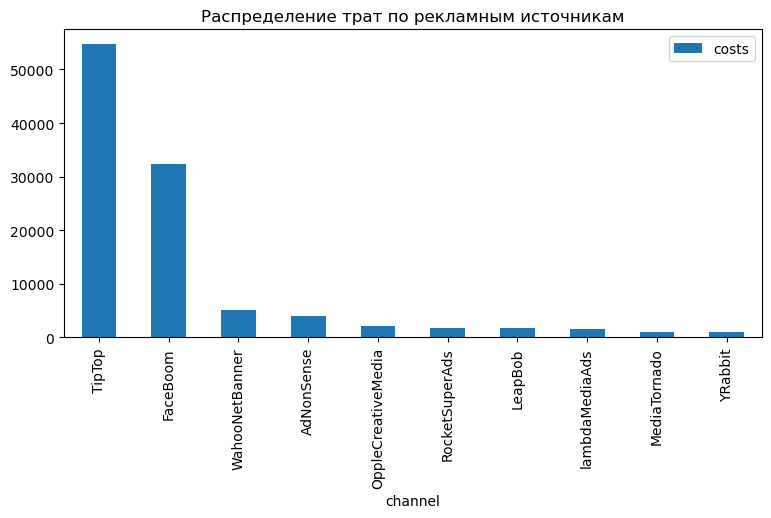

In [96]:
channel_costs.plot(kind='bar',
                   figsize=(9, 4),
                   title='Распределение трат по рекламным источникам');

*Вывод:*

82,7% рекламного бюджета распределены между двумя источниками - TipTop и FaceBoom.

Самые высокие траты на рекламу по каналу TipTop - 51,9%, 54,7 тыс.дол.

Далее идет канал FaceBoom - 30,8%, 32,4 тыс.дол.

На остальные источники в сумме ушло 17,3% рекламного бюджета (менее 5% на источник).

#### Визуализация динамики изменения расходов по времени (по неделям и месяцам) по каждому источнику

Построим график динамики изменения расходов на рекламу по времени:

In [98]:
#создадим датафрейм с которым будем работать для построения графиокв
costs_copy = costs.copy()
costs_copy['dt'] = pd.to_datetime(costs_copy['dt'])
costs_copy['week'] =  costs_copy['dt'].dt.isocalendar().week
costs_copy['month'] = costs_copy['dt'].dt.month

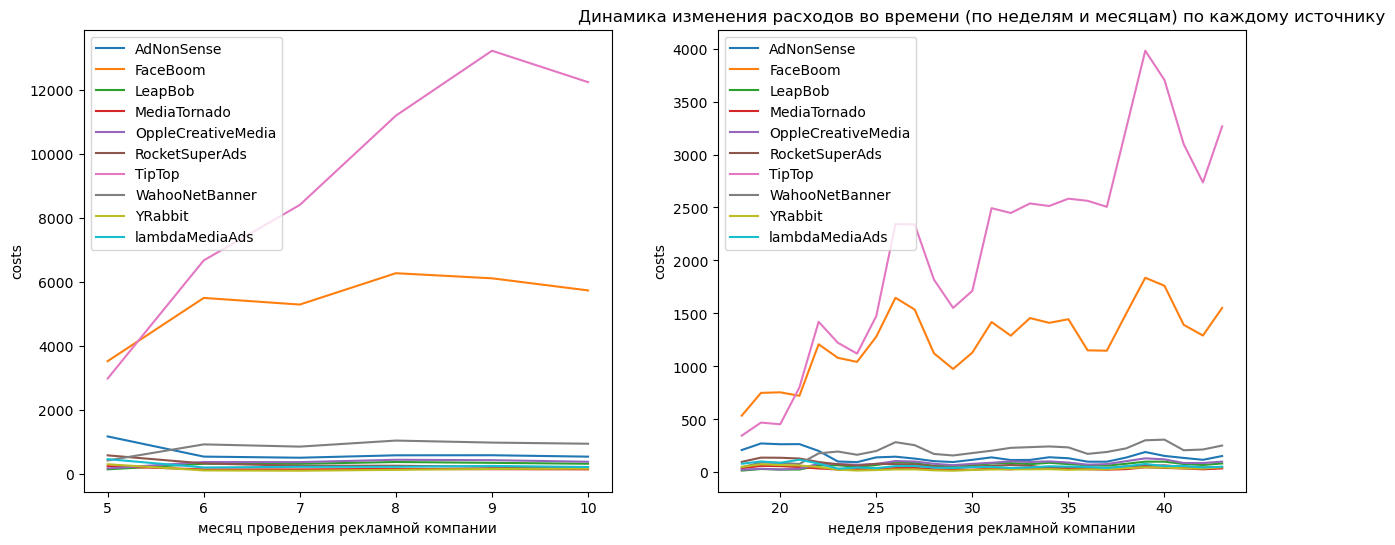

In [100]:
#создаем сводную таблицу по тратам по месяцам по каждому источнику
pivot1 = costs_copy.pivot_table(index = 'month',\
                                columns = 'channel',\
                                values = 'costs',\
                                aggfunc = 'sum')
#создаем сводную таблицу по тратам по неделям по каждому источнику
pivot2 = costs_copy.pivot_table(index = 'week',\
                                columns = 'channel',\
                                values = 'costs',\
                                aggfunc = 'sum')

#строим графики
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].plot(pivot1)
axs[0].set_xlabel('месяц проведения рекламной компании')
axs[0].set_ylabel('costs')
axs[0].legend(labels=pivot1.columns)

axs[1].plot(pivot2)
axs[1].set_xlabel('неделя проведения рекламной компании')
axs[1].set_ylabel('costs')
axs[1].legend(labels=pivot2.columns)

plt.title('Динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику')
plt.show();

*По графикам можно сделать следующие выводы:*
- Расходы по всем источникам, кроме TipTop и FaceBoom, достаточно стабильны, не растут в динамике.
- Большая часть расходов (83%) приходится на источники TipTop и FaceBoom и они растут из месяца в месяц. Соответственно, растут общие расходы на рекламу.

#### Расчет стоимости привлечения одного пользователя (CAC) из каждого источника

Рассчитаем средний CAC на одного пользователя для всего проекта:

In [102]:
#исключаем из расчета органических пользователей
profiles1 = profiles[profiles['channel'] != 'organic']

In [104]:
print('Средняя стоимость привлечения одного пользователя для всего проекта составила',\
      round(profiles1['acquisition_cost'].mean(), 3))

Средняя стоимость привлечения одного пользователя для всего проекта составила 1.127


Рассчитаем средний CAC на одного пользователя по источникам:

In [108]:
profiles1.groupby('channel').agg({'acquisition_cost': 'mean'})\
.sort_values(by='acquisition_cost', ascending=False)\
.style.format(precision=3)\
.background_gradient('YlOrRd')

,acquisition_cost
channel,
TipTop,2.799
FaceBoom,1.113
AdNonSense,1.008
lambdaMediaAds,0.725
WahooNetBanner,0.602
RocketSuperAds,0.412
OppleCreativeMedia,0.250
YRabbit,0.219
MediaTornado,0.219


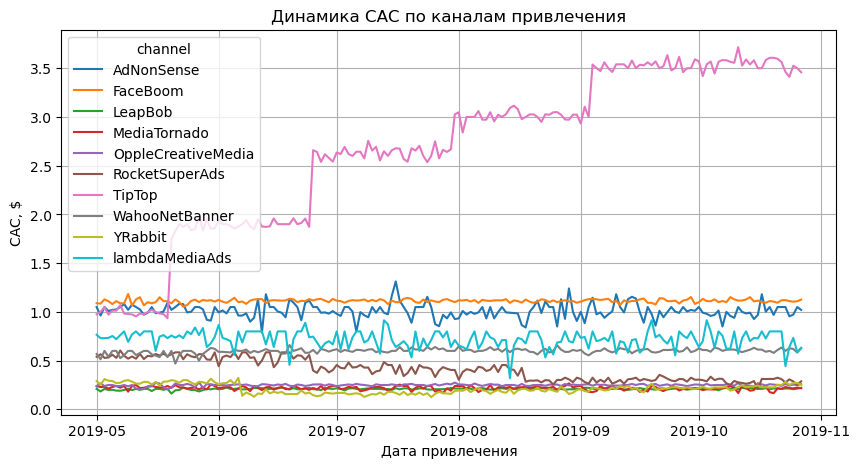

In [110]:
# строим график истории изменений CAC по каналам привлечения

profiles1.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

*Вывод:*

Самый высокий CAC у источника TipTop - 2,8$ на пользователя. Растет из месяца в месяц. Из этого канала приходят самые "дорогие" для компании пользователи.

На втором месте FaceBoom 1,1 дол. на пользователя. На третьем AdNonSense - 1 дол.

#### Промежуточный вывод

Общая сумма расходов на маркетинг за рассматриваемый период составила 105 497 дол.

Большая часть расходов на рекламу (83%) приходится на два источника:
- TipTop - 51,9%
- FaceBoom - 30,8%

Расходы по всем источникам, кроме TipTop и FaceBoom, достаточно стабильны, не растут в динамике.

Расходы по источникам TipTop и FaceBoom растут из месяца в месяц. Соответственно, растут общие расходы на рекламу.

Средняя стоимость привлечения одного пользователя для всего проекта составила 1.1$. Самая высокая стоимость привлечения у источника TipTop - 2.8 дол. на пользователя. Из этого канала приходят самые "дорогие" для компании пользователи. Далее по стоимости привлечения идут FaceBoom - 1.1 дол., AdNonSense - 1 дол.

### Оценка окупаемости рекламы

Установим момент и горизонт анализа данных. 

Считаем, что на календаре 1 ноября 2019 года, зададим горизонт анализа в две недели.

In [112]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

Для анализа будем использовать отфильтрованные датафреймы без учета органических пользователей, так как за них компания не платит.
Датафрейм profiles мы отфильтровали ранее, теперь нужно отфильтровать orders и visits:

In [115]:
organic_users = profiles.query('channel == "organic"')['user_id']

In [117]:
orders1 = orders.query('user_id not in @organic_users')

In [119]:
visits1 = visits[visits['channel'] != 'organic']

#### Анализ общей окупаемости рекламы

Проанализируем общую окупаемость рекламы:

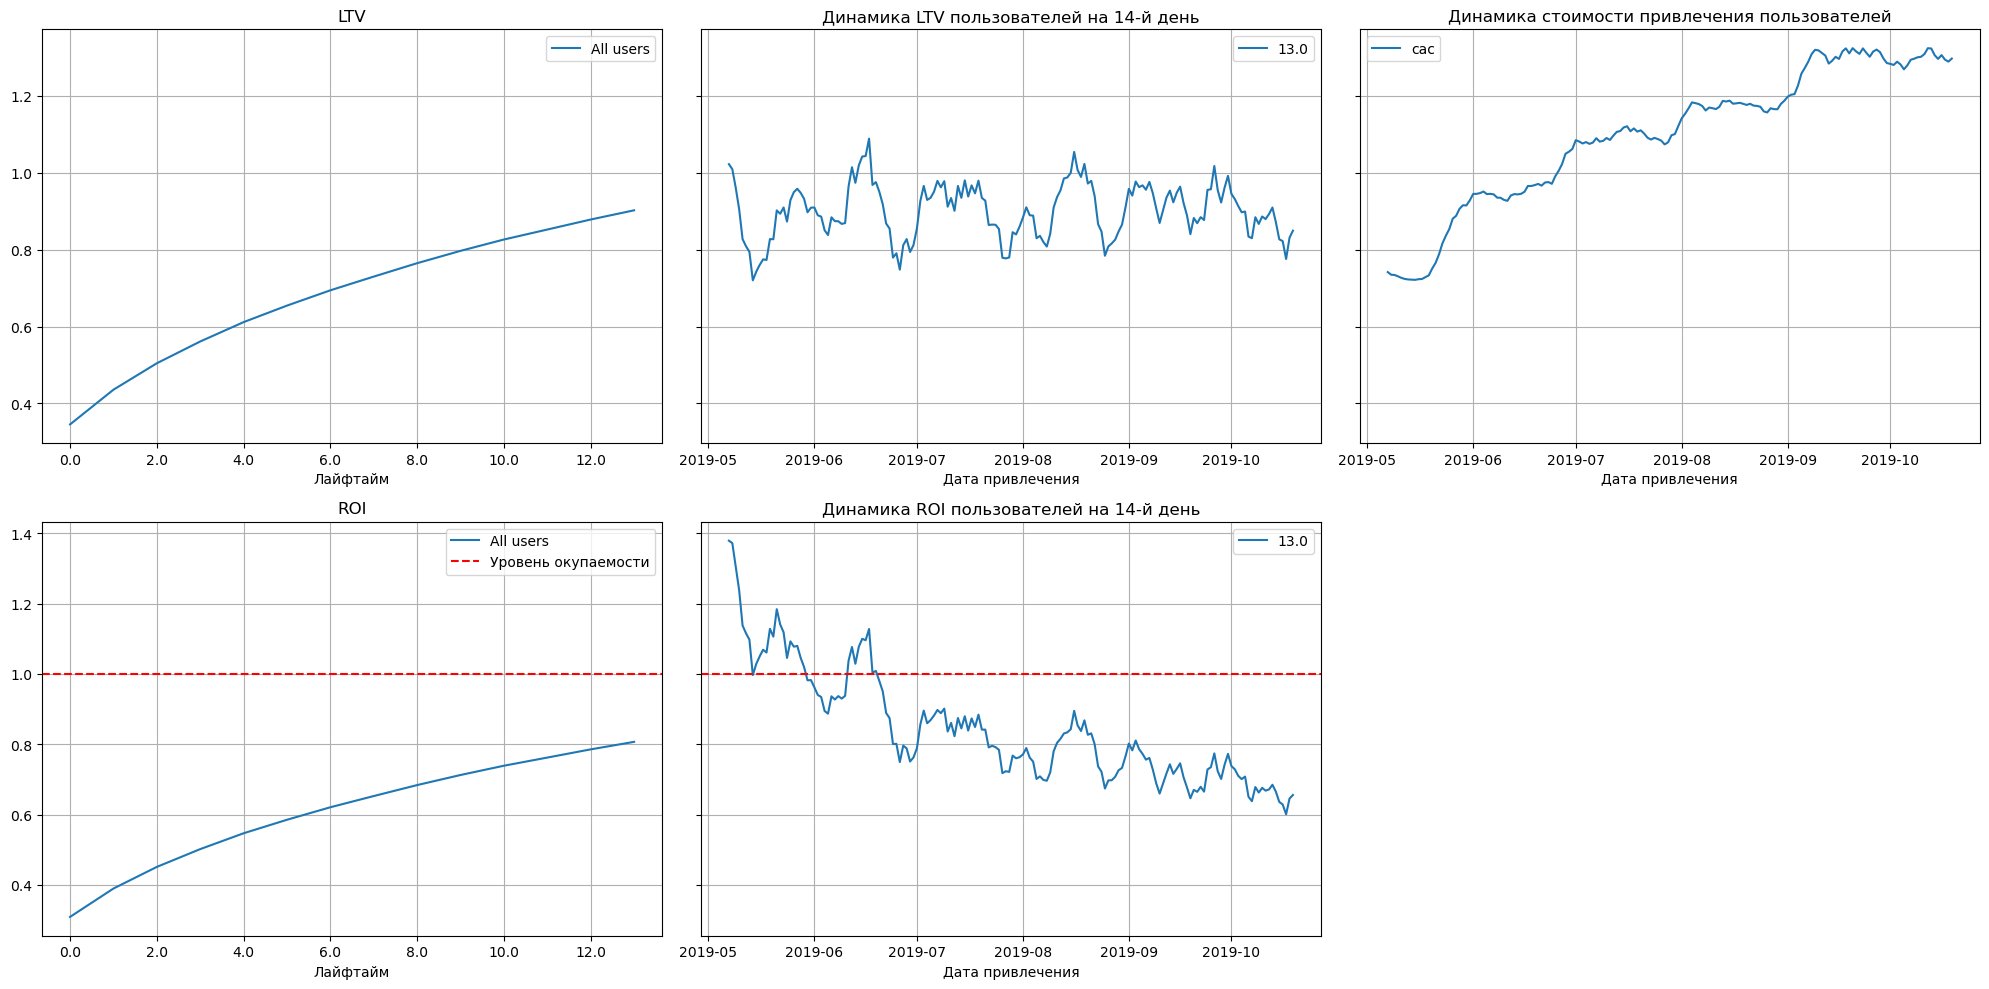

In [121]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders1, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

*По графикам можно сделать такие выводы:*
- Реклама не окупается. ROI в конце 14-дн срока — чуть выше 80%. 
- CAC имеет постоянный рост. Рекламный бюджет увеличивается во времени. 
- По графику динамики LTV пользователей можно сказать, что показатель LTV находится в пределах 0.7-1.1 - уменьшается к концу месяца, растет в середине следующего, тенденции к уменьшению LTV во времени не наблюдается. 
- ROI пользователей на 14-й день имеет яркую тенденцию к снижению.

Чтобы разобраться в причинах не окупаемости рекламы, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

#### Анализ окупаемости рекламы с разбивкой по устройствам

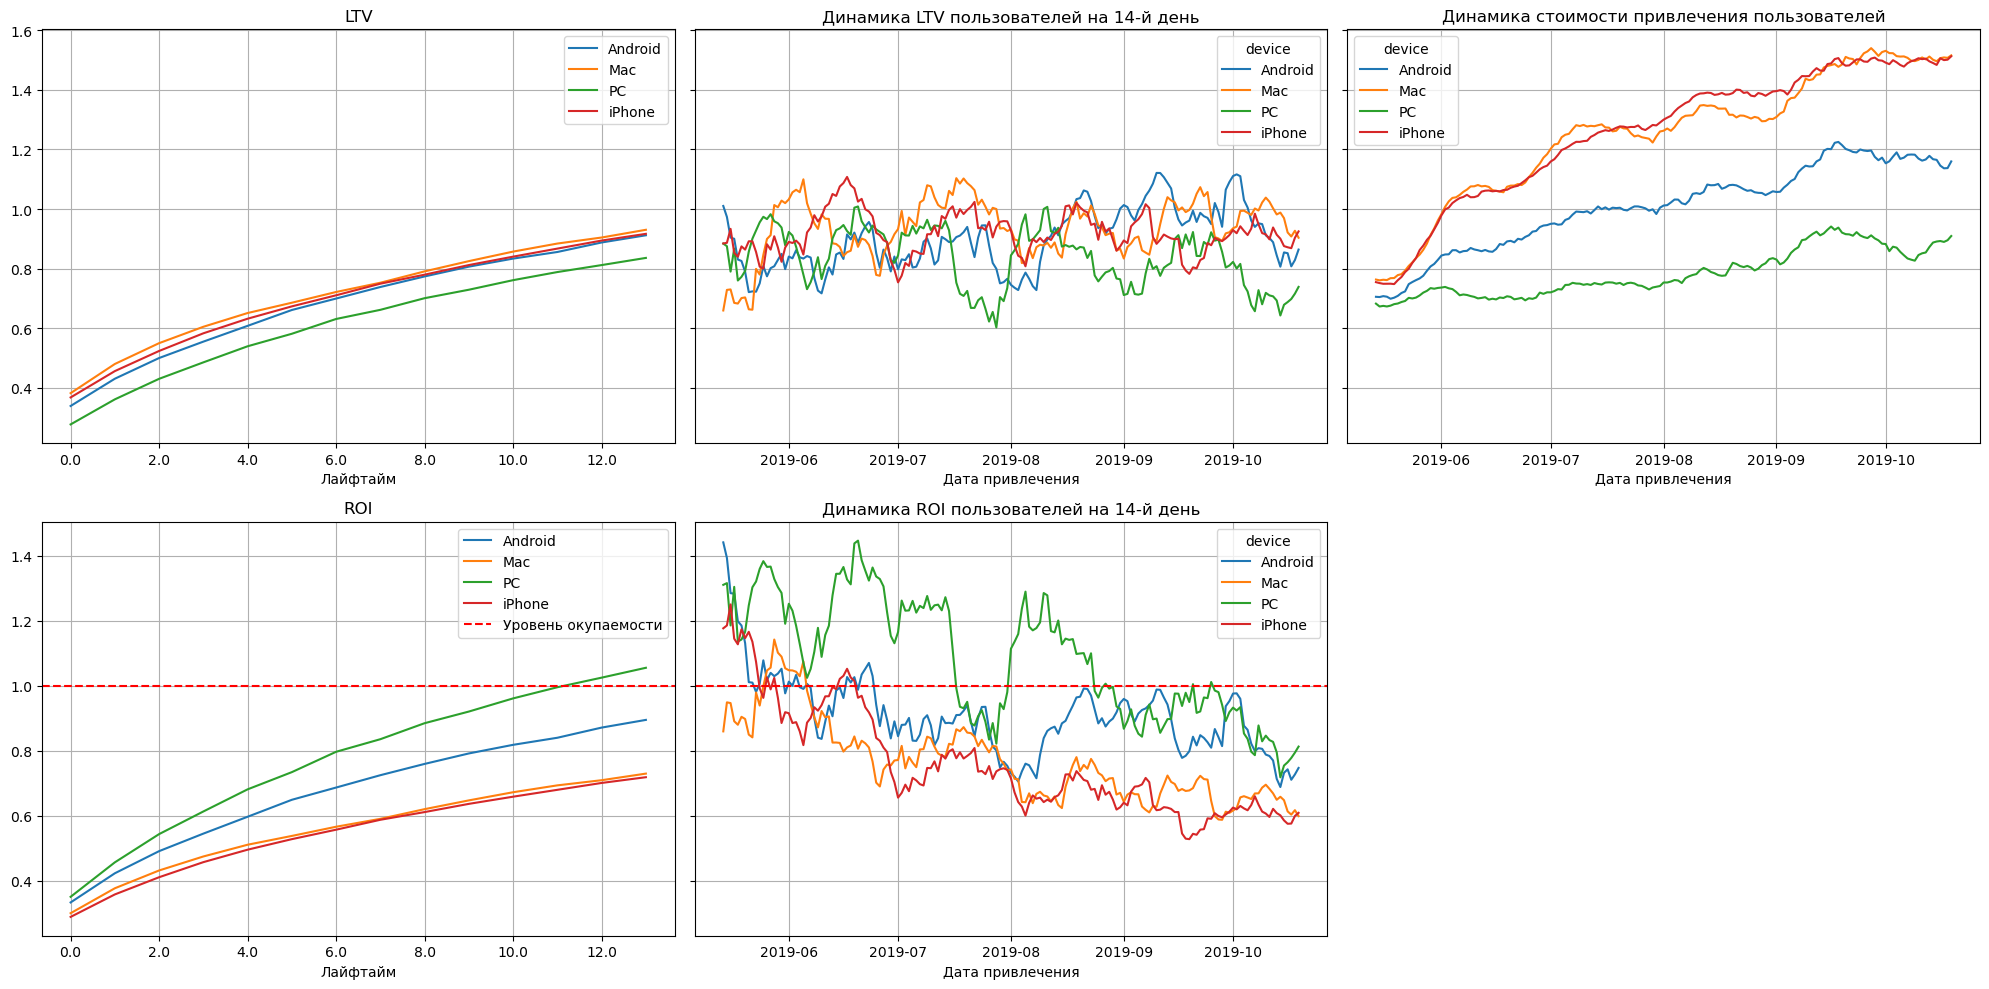

In [123]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders1, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

*По графикам можно сделать такие выводы:*

- Реклама не окупается на устройствах Apple и Android. Для пользователей PC окупаемость достигается к 11 дню.
- Стоимость привлечения пользователей для всех устройств имеет тенденцию к росту. 
Она примерно одинакова для пользователй Mac и iPhone - по этим категориям наблюдается самый большой рост CAC - с примерно 0,75 дол. в мае 2019 до 1,5 дол. в октябре 2019.
CAC для пользователей Android вырос с 0,7 дол. до 1,2 дол.
Самая низкая стоимость привлечения у пользователей PC, но CAC для этой категории также выросос со временем - с 0,7 дол. до 0,9 дол.
- LTV для пользователей Apple и Android примерно одинаков, для пользователей PC немного ниже.
- На графике динамики LTV пользователей на 14-й день не наблюдается яркой тенденции к снижению или увеличению показателя со временем.
- По графику динамики ROI пользователей на 14-й день можно сказать, что показатель имеет общую тенденцию к снижению со временем, для пользователей Apple она более яркая - примерно с конца мая ROI ниже 1, пользователи PC окупались до сентября (с провалом в конце июля).

#### Анализ окупаемости рекламы с разбивкой по странам

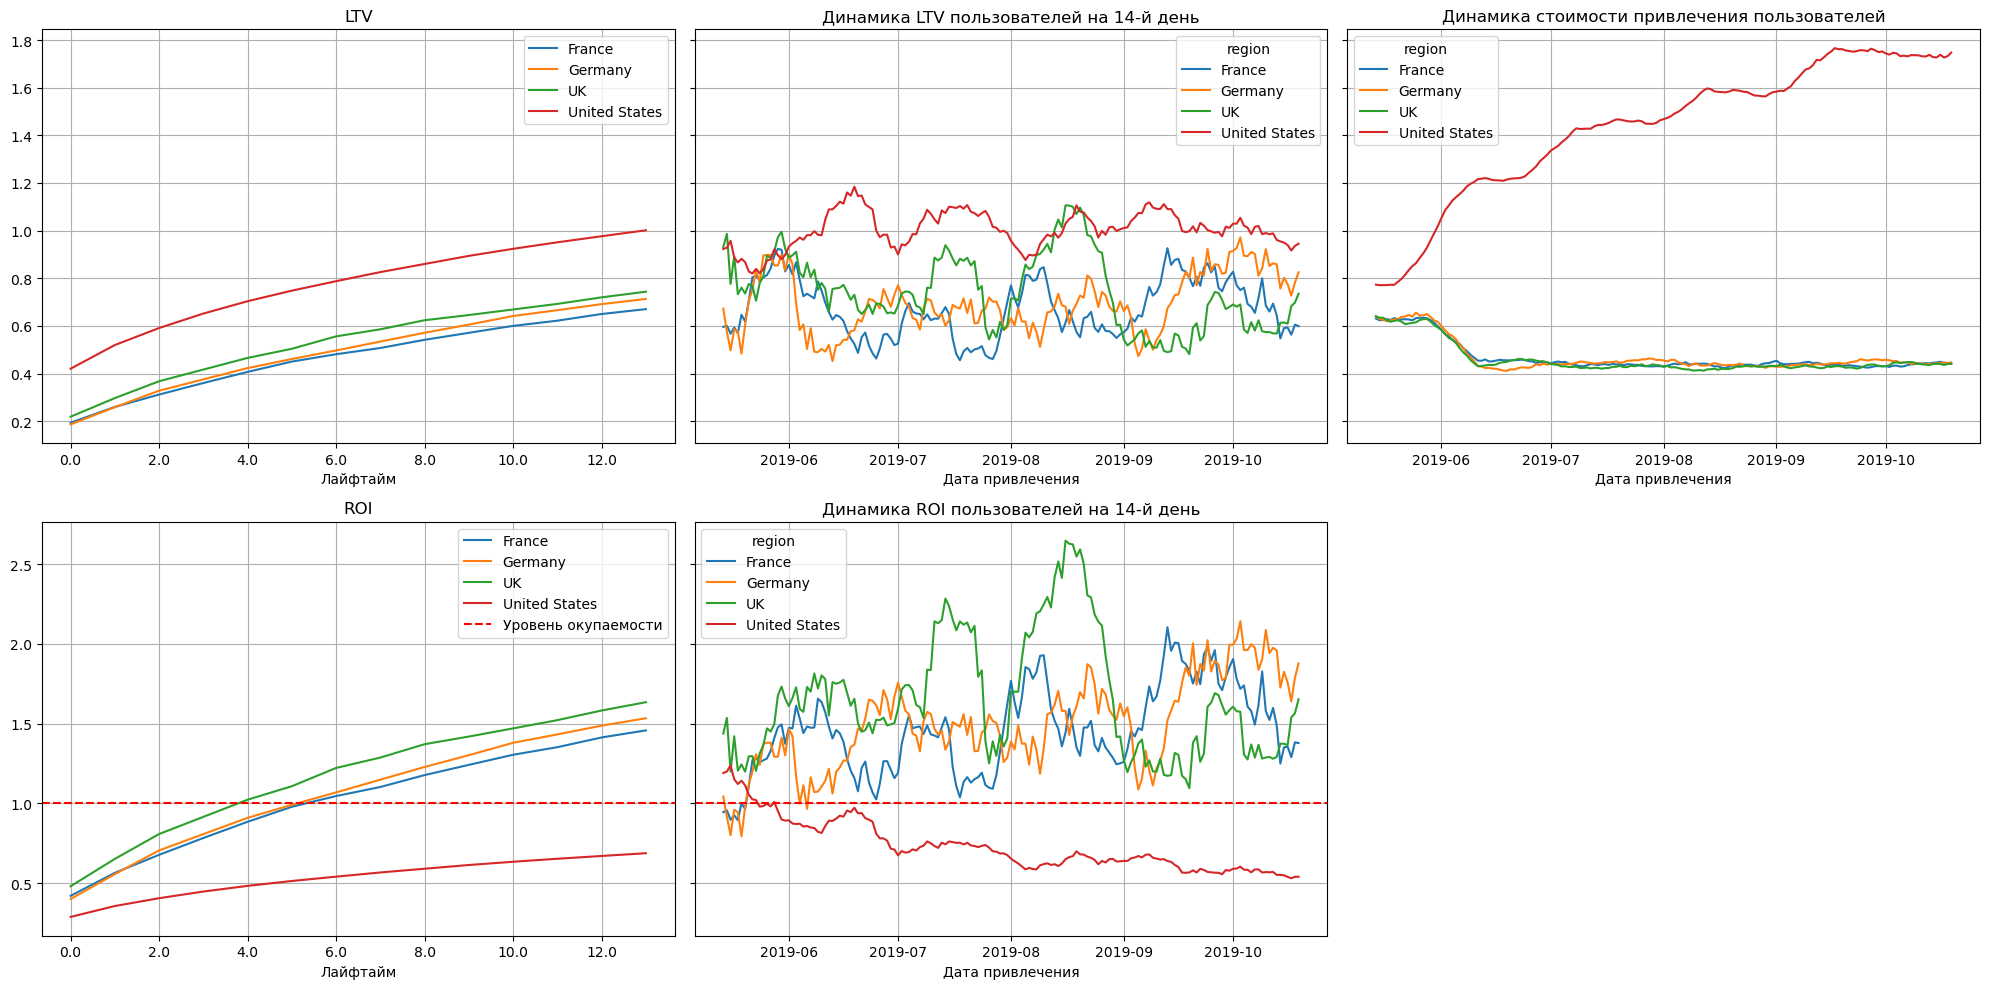

In [125]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders1, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сделать такие выводы:

- Реклама не окупается только в США. Пользователи в других странах выходят на окупаемость примерно к 4-5 дню лайфтайма.
- Стоимость привлечения пользователей в США сильно выросла со временем - с 0,8 дол. до 1.75 дол. В остальных странах CAC уменьшился в июне и со временем стабилен.
- Самый высокий LTV - для пользователей США, далее идет Великобритания, Германия и Франция.
- На графике динамики LTV пользователей на 14-й день не наблюдается яркой тенденции к снижению или увеличению показателя со временем, показатель стабилен для пользователей США, в других странах он "прыгает", но находится примерно в одних рамках.
- По графику динамики ROI пользователей на 14-й день можно сказать, что в конце мая пользователи из США перестали окупаться и со временем окупаемость в США падает. Пользователи в других странах стабильно окупаются.

Так как большинство пользователей из США (66,6%), они сильно влияют на общую окупаемость.

#### Анализ окупаемости рекламы с разбивкой по рекламным каналам

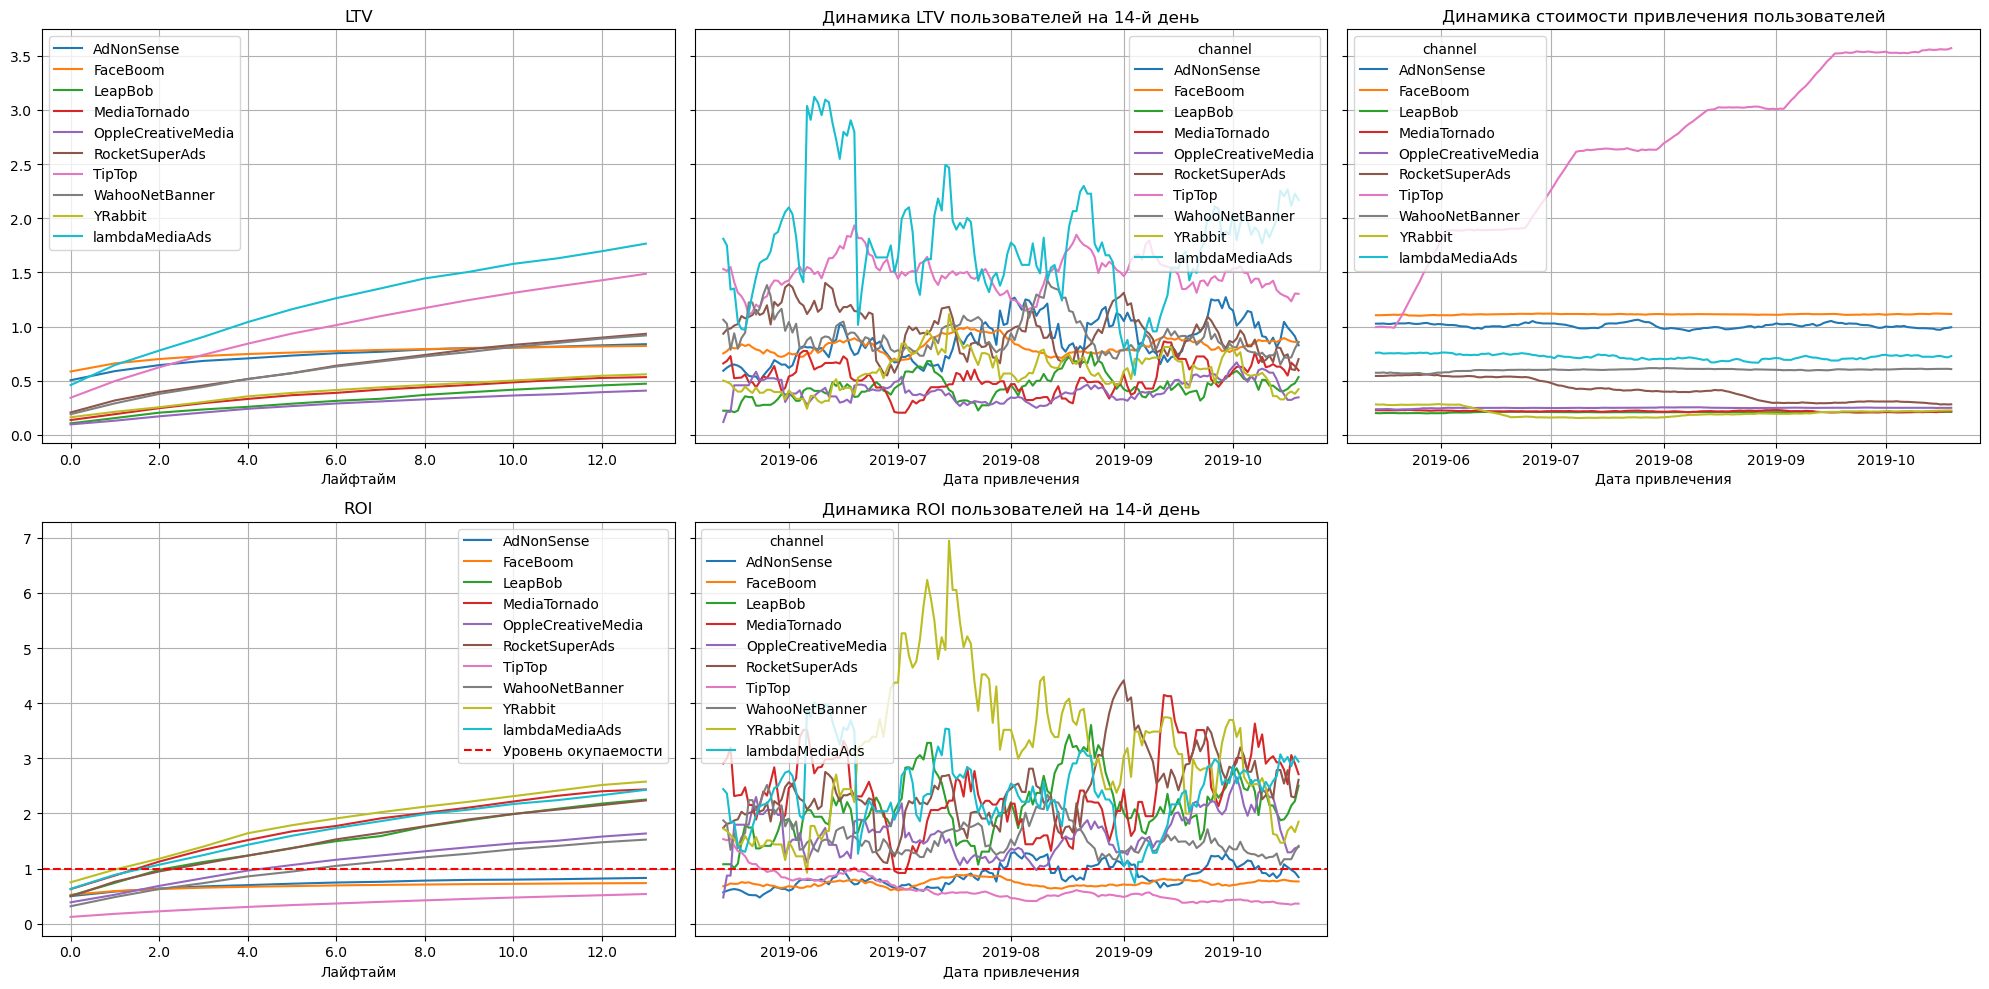

In [128]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders1, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

*По графикам можно сделать такие выводы:*

- пользователи, пришедшие из AdNonSense, FaceBoom, TipTop не окупаются в 14-дневный срок. По остальным каналам наблюдается выход на окупаемость с 1 по 5 дни лайфтайма.
- лидерами по окупаемости являются YRabbit, MediaTornado, lambdaMediaAds, они выходят в плюс уже ко второму дню.
- стоимость привлечения пользователей стабильна для всех каналов, кроме TipTop - для него стоимость привлечения сильно выросла во времени.
- самые высокие LTV у пользователей, пришедших из lambaMediaAds. Далее идет канал TipTop.
- динамика LTV стабильна для пользователей, пришедших из всех каналов, кроме lambdaMediaAds - на графике динамики которого наблюдаются скачки, однако это можно объяснить малочисленностью пользователей, пришедших из этого канала.
- по графику динамики ROI пользователей на 14-й день можно выделить канал YRabbit, который имел в июле-августе скачок окупаемости, но с того времени идет уменьшение показателя окупаемости по этому каналу. AdNonSense, FaceBoom и TipTop стабильно не окупаются. На момент октября 2019 г идет рост окупаемости по каналам MediaTornado, RocketSuperAds, lambdaMediaAds.

Больше всего платящих пользователей пришло из FaceBoom (40%) и TipTop (21%). Однако, максимальные траты на рекламу также были произведены по этим каналам - TipTop(52%) и FaceBoom(31%). По этой причине окупаемость по этим каналам сильно влияет на общую окупаемость.

#### Анализ конверсии и удержания пользователей с разбивкой по устройствам

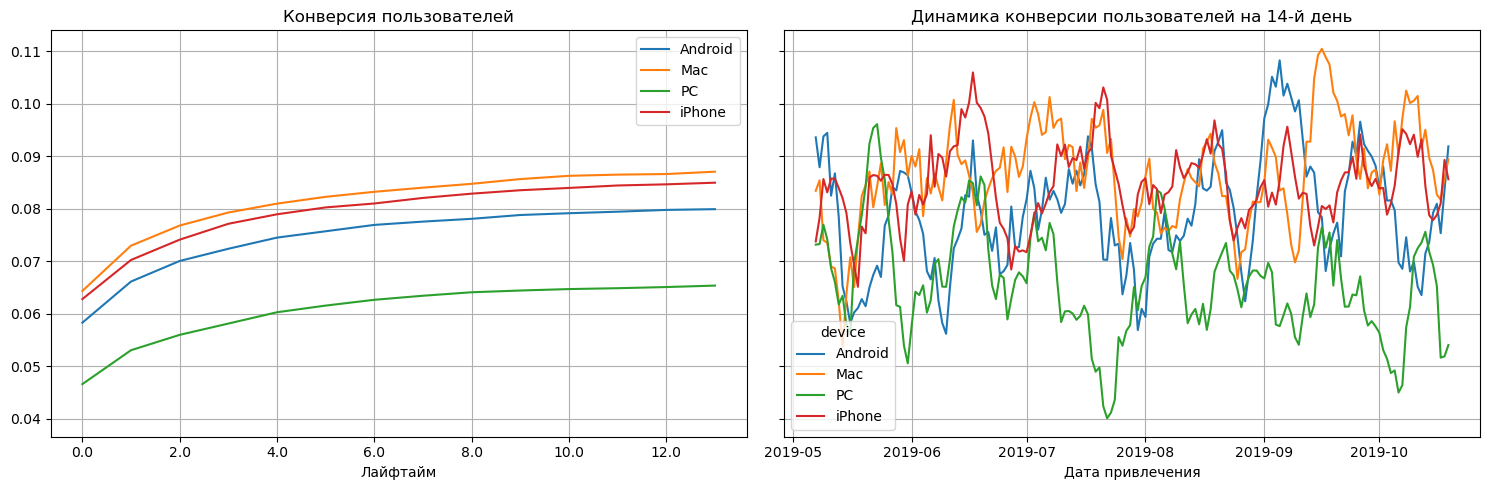

In [130]:
#проверим конверсию пользователей с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders1, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей Apple выше остальных. Ниже всех конверсия на устройствах PC.

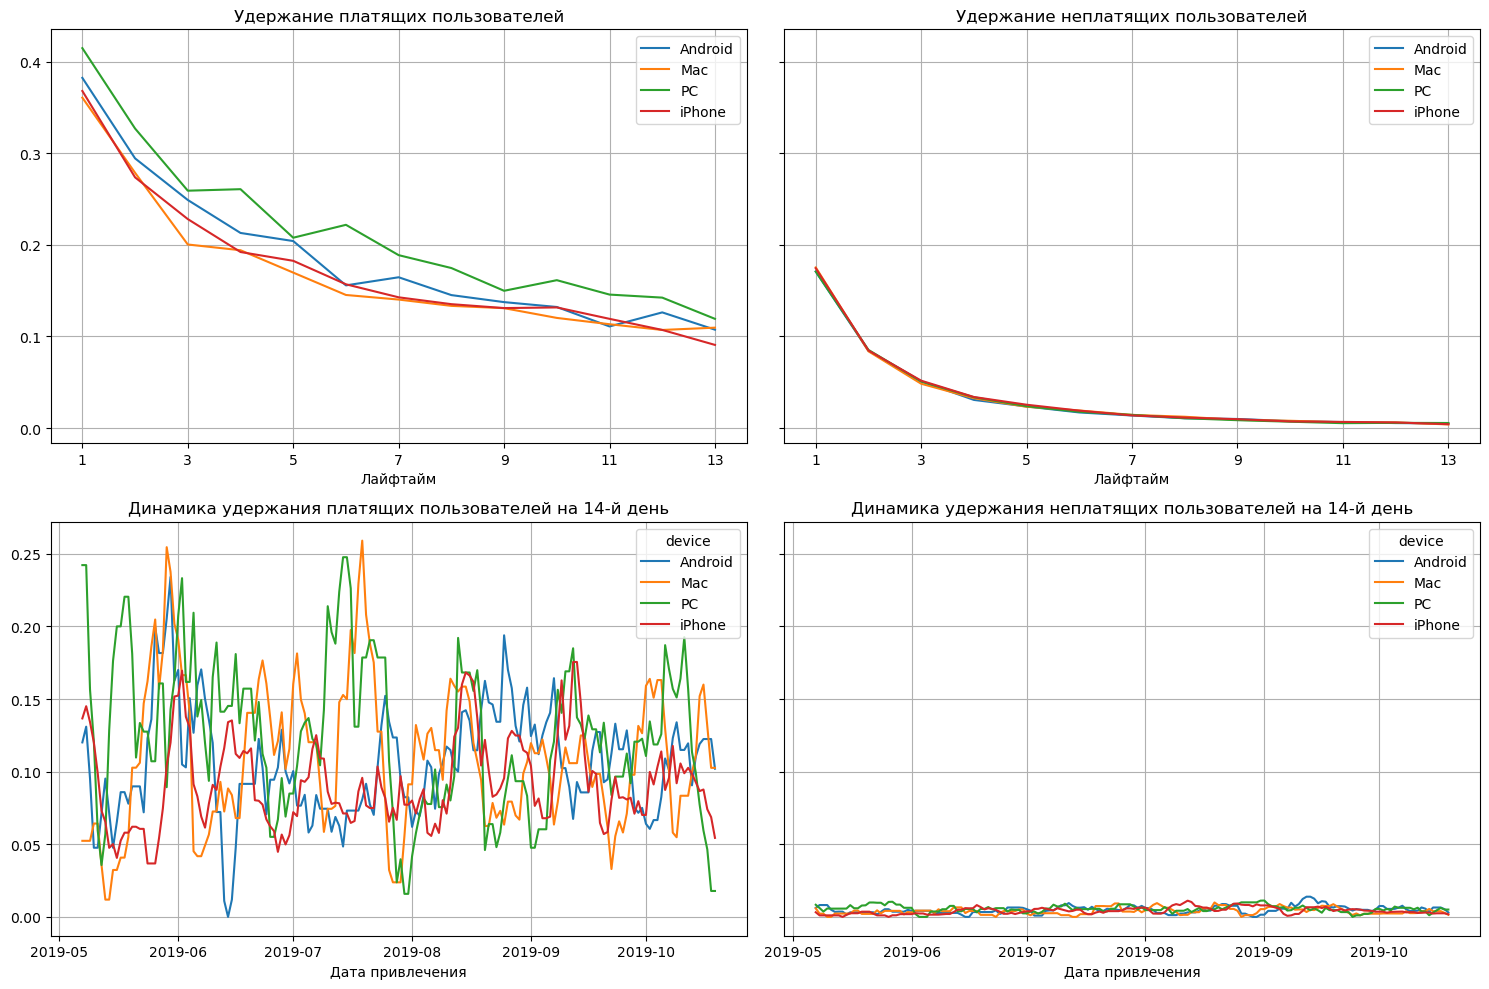

In [133]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits1, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

В тоже время платящие пользователи Apple удерживаются хуже остальных. Немного лучше других удерживаются пользователи PC.

#### Анализ конверсии и удержания пользователей с разбивкой по странам

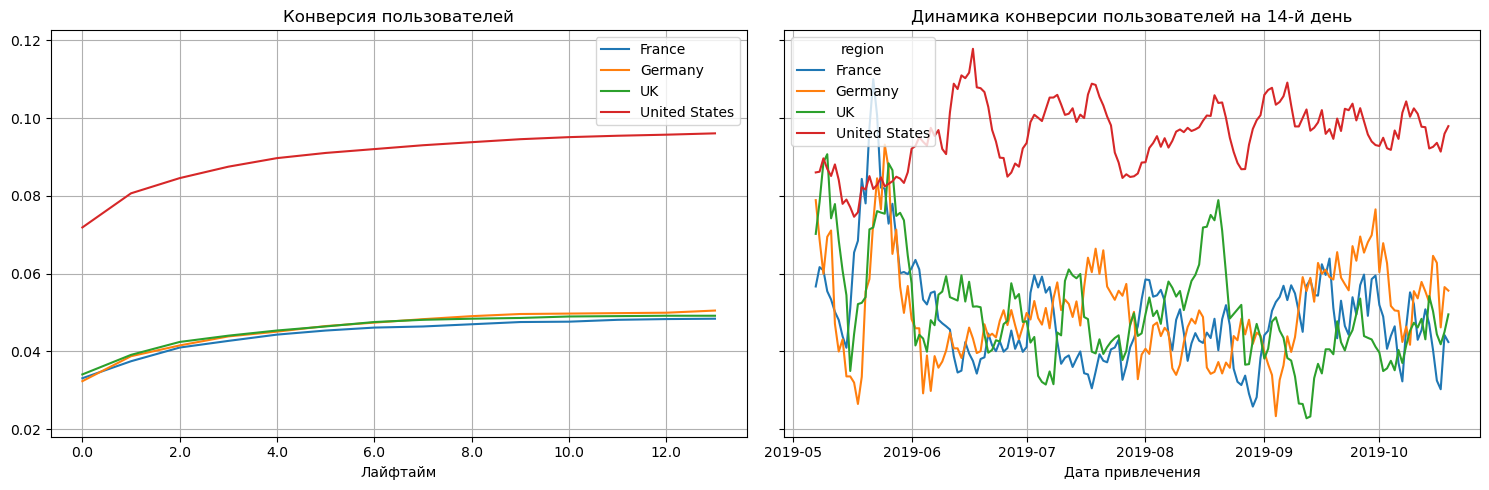

In [137]:
#проверим конверсию пользователей с разбивкой по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders1, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия - у пользователей из США, к концу анализируемого периода достигает примерно 10%. Для остальных стран конверсия примерно равна и она в два раза ниже, чем конверсия для пользователей из США.

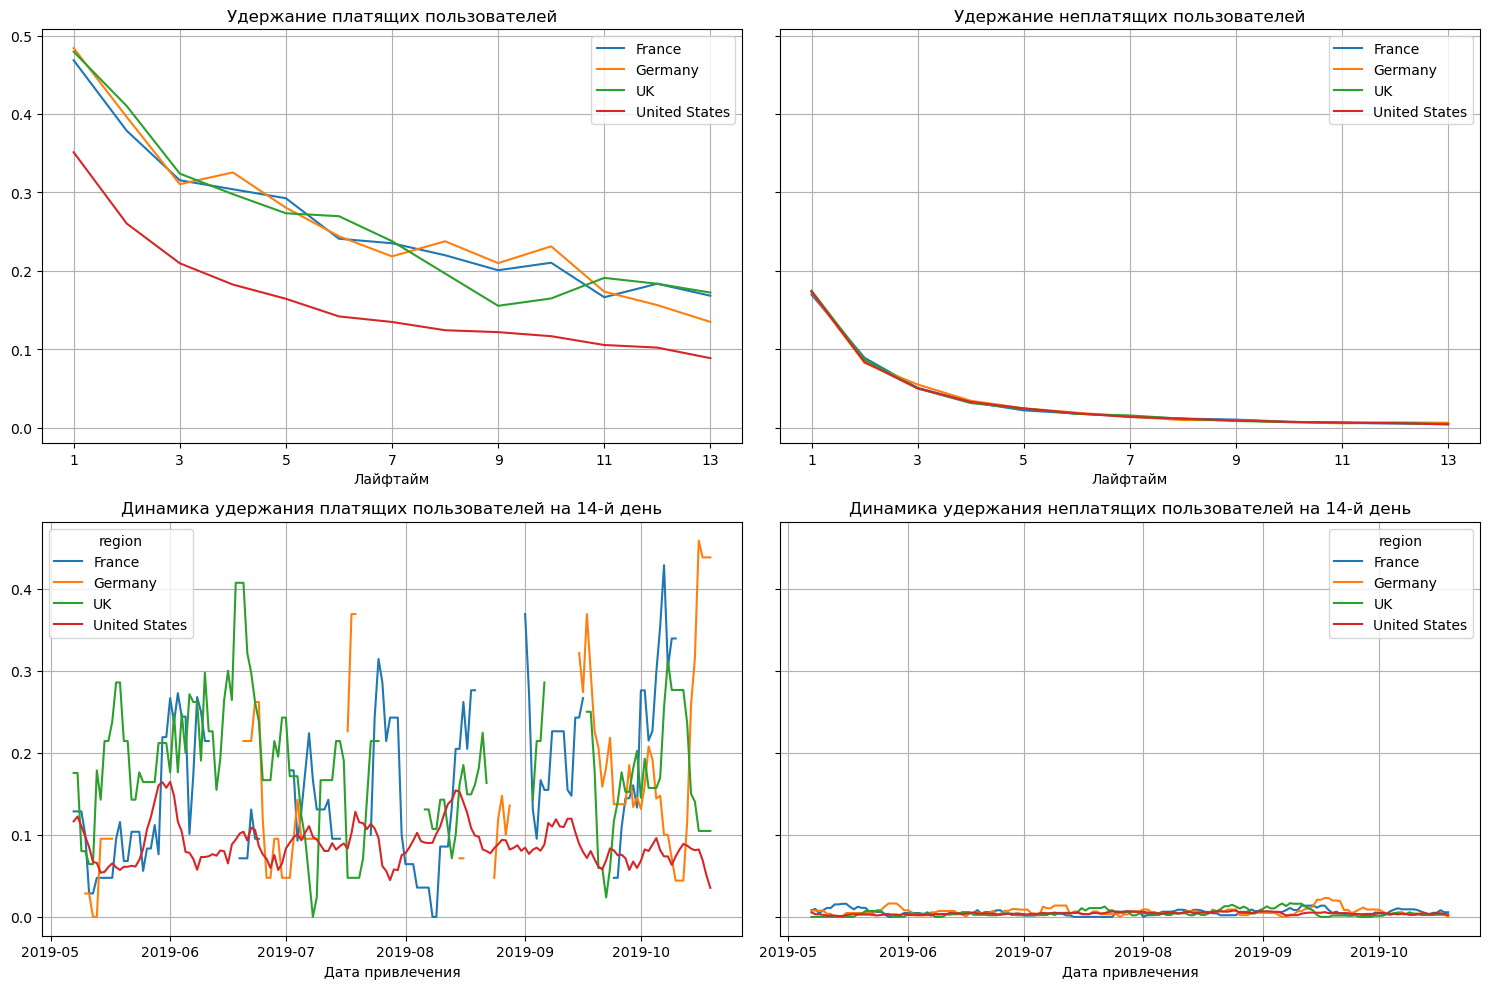

In [140]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits1, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей примерно одинаково для всех стран кроме США - там удержание ниже примерно на 10%, чем в других странах.

#### Анализ конверсии и удержания пользователей с разбивкой по рекламным каналам

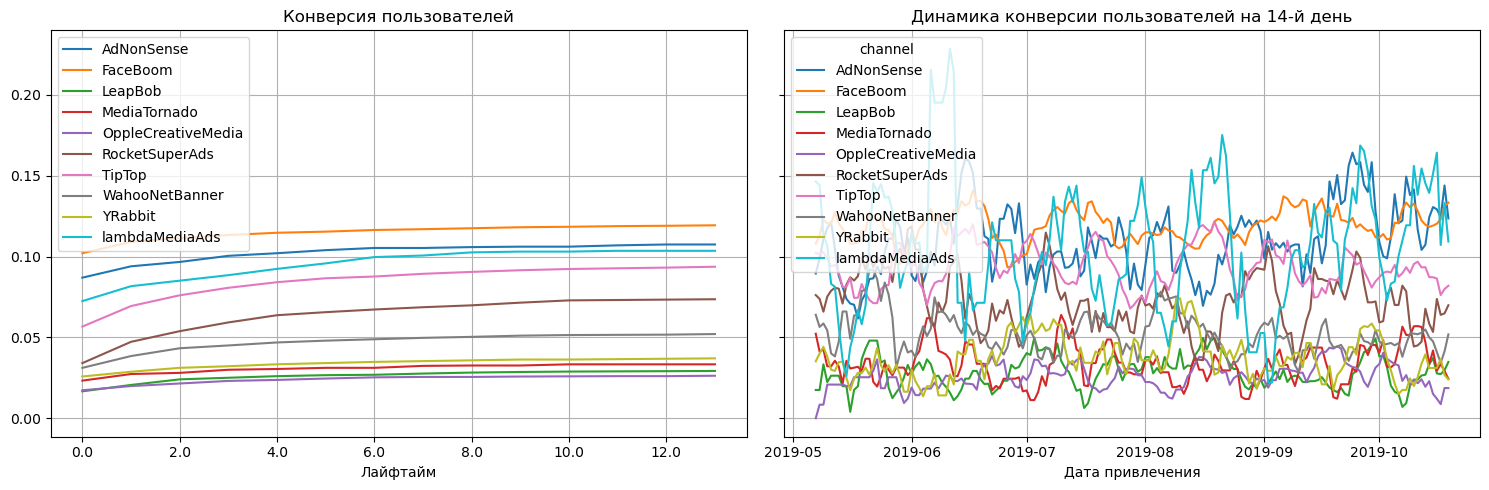

In [144]:
#проверим конверсию пользователей с разбивкой по рекламным каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders1, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия у пользователей, пришедших из каналов FaceBoom, AdNonSense, lambdaMediaAds. 
Самая низкая - YRabbit, MediaTornado, LeapBob, OppleCreativeMedia.

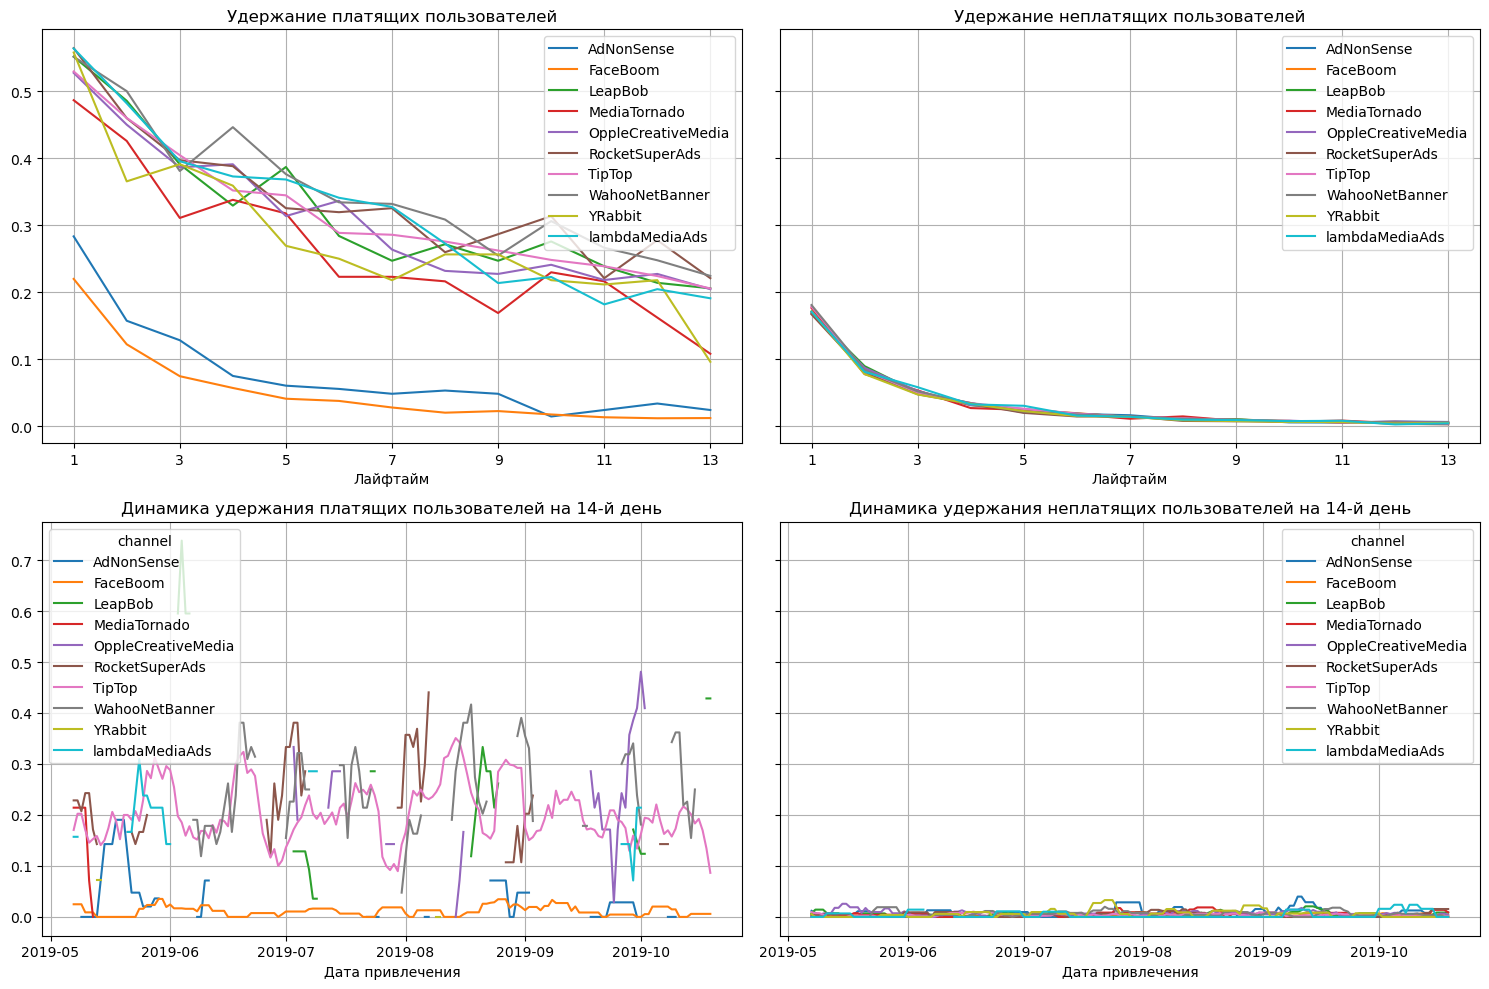

In [147]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits1, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Хуже всех удержание пользователей, пришедших из FaceBoom, AdNonSense. 
Таким образом, пользователи, пришедшие из FaceBoom, заходят в приложение и совершают покупку один раз. Такая же ситауция у пользователей, пришедших из AdNonSense.

#### Вывод

Исходя из проведенного исследования можно сделать следующие выводы:

1) В целом, реклама, направленная на привлечение пользователей, не окупается. ROI в конце 14-дневного срока — чуть выше 80%.

2) Негативное влияние на окупаемость рекламы оказывают следующие факторы:
- максимальное влияние на окупаемость оказывает регион пользователей - реклама не окупается только для пользователей из США. Пользователи в других странах выходят на окупаемость примерно к 4-5 дню лайфтайма.
- не окупается реклама только для трех каналов привлечения - AdNonSense, FaceBoom, TipTop. По остальным каналам наблюдается выход на окупаемость с 1 по 5 дни лайфтайма.
- реклама не окупается на устройствах Apple и Android.
          
3) Проблемы окупаемости могут быть вызваны следующими причинами:

83% рекламного бюджета потрачены на рекламу в двух источниках: TipTop(52%) и FaceBoom(31%). Расходы по этим источникам растут из месяца в месяц. Однако, пользователи, пришедшие из FaceBoom и TipTop не окупаются в 14-дневный срок.

Пользователи из FaceBoom имеют самую высокую конверсию, однако хуже всех удерживаются, таким образом, они приходят в приложение и совершают покупку один раз.

Пользователи из TipTop, имеют среднюю конверсию и удержание, однако, они являются самыми "дорогими" пользователями для компании по стоимости их привлечения - 2.8 дол. за пользователя, в то время как средняя стоимость привлечения пользователей для всего проекта  - 1.1 дол.

Таким образом, компании необходимо пересмотреть рекламный бюджет по каналам привлечения пользователей.

### Общий вывод и рекомендации

Проведенный анализ показал следующее:
1) Пользователи приходят в приложение из четырех стран:
* США (100 тыс.чел.),
* Великобритания (17,6 тыс.чел.),
* Франция (17,4 тыс.чел.),
* Германия (14,9 тыс.чел.).

Больше всего платящих пользователей из США - 6902 чел., конверсия - 6,9%.

Конверсия в остальных странах примерно одинакова и составляет:
* Германия 4,1% (616 платящих польз.)
* Великобритания 4% (700 платящих польз.)
* Франция 3,8% (663 платящих польз.)

3) Пользователи заходят в приложение со следующих устройств:
* iPhone (54,5 тыс. чел.)
* Android (35,0 тыс. чел.)
* PC (30,4 тыс. чел.)
* Mac (30,0 тыс. чел.)

Самое большое количество платящих пользователей среди этих групп - пользователи iPhone (3382 пользователя). Конверсия - 6,2%.

Самая большая конверсия у пользователей Mac - 6,4%, 1912 пользователей.

Количество платящих пользователей Android - 2050, конверсия - 5,9%.

Самая маленькая конверсия у пользователей PC - 5%, 1537 плательщика.

4) Больше всего платящих пользователей пришло из канала FaceBoom - 3557 чел. У этого канала самая высокая конверсия - 12,2%.

На втором месте канал TipTop - 1878 плательщика, конверсия 9,6%.

Далее идут органические пользователи - 1160 человека, однако конверсия по ним самая маленькая - 2,1%.

Также стоит отметить два канала с высокой конверсией, но небольшим количеством плательщиков: AdNonSense - 440 плательщика, конверсия - 11,3%, lambdaMediaAds - 225 плательщика, 10,5% конверсия.

5) Общая сумма расходов на маркетинг за рассматриваемый период составила 105 497 дол.

Большая часть расходов на рекламу (83%) приходится на два источника:
* TipTop - 51,9%
* FaceBoom - 30,8%

Расходы по всем источникам, кроме TipTop и FaceBoom, достаточно стабильны, не растут в динамике.

Расходы по источникам TipTop и FaceBoom растут из месяца в месяц. Соответственно, растут общие расходы на рекламу.

Средняя стоимость привлечения одного пользователя для всего проекта составила 1.1$.

Самая высокая стоимость привлечения у источника TipTop - 2.8 дол. на пользователя. Из этого канала приходят самые "дорогие" для компании пользователи. Далее по стоимости привлечения идут FaceBoom - 1.1 дол., AdNonSense - 1 дол.

6) По окупаемости рекламы можно сделать такие выводы:
- реклама не окупается. ROI в конце 14-дн срока — чуть выше 80%.
- CAC имеет постоянный рост. Рекламный бюджет компании растет во времени.
- реклама не окупается только в США. Пользователи в других странах выходят на окупаемость примерно к 4-5 дню лайфтайма.
- стоимость привлечения пользователей в США сильно выросла со временем - с 0,8 дол. до 1.75 дол. В остальных странах CAC уменьшился в июне и со временем стабилен.
- реклама не окупается на устройствах Apple и Android. Для пользователей PC окупаемость достигается к 11 дню.
- пользователи, пришедшие из AdNonSense, FaceBoom, TipTop не окупаются в 14-дневный срок. По остальным каналам наблюдается выход на окупаемость с 1 по 5 дни лайфтайма.
- лидерами по окупаемости являются YRabbit, MediaTornado, lambdaMediaAds, они выходят в плюс уже ко второму дню лайфтайма.
- стоимость привлечения пользователей стабильна для всех каналов, кроме TipTop - для него стоимость привлечения сильно выросла во времени.
- самые высокие LTV у пользователей, пришедших из lambaMediaAds. Далее идет канал TipTop.
- по графику динамики ROI пользователей на момент октября 2019 г идет рост окупаемости по каналам MediaTornado, RocketSuperAds, lambdaMediaAds.
- больше всего платящих пользователей пришло из FaceBoom (40%) и TipTop (21%). Однако, максимальные траты на рекламу также были произведены по этим каналам - TipTop(52%) и FaceBoom(31%). По этой причине окупаемость по этим каналам сильно влияет на общую окупаемость.
- конверсия пользователей Apple выше остальных. Ниже всех конверсия на устройствах PC. В тоже время платящие пользователи Apple удерживаются хуже остальных. Немного лучше других удерживаются пользователи PC.
- самая высокая конверсия - у пользователей из США, к концу анализируемого периода достигает примерно 10%. Для остальных стран конверсия примерно равна и она в два раза ниже, чем конверсия для пользователей из США.
- удержание платящих пользователей примерно одинаково для всех стран кроме США - там удержание ниже примерно на 10%, чем в других странах.
- самая высокая конверсия у пользователей, пришедших из каналов FaceBoom, AdNonSense, lambdaMediaAds. Самая низкая - YRabbit, MediaTornado, LeapBob, OppleCreativeMedia.
- хуже всех удержание пользователей, пришедших из FaceBoom, AdNonSense. Таким образом, пользователи, пришедшие из FaceBoom, заходят в приложение и совершают покупку один раз. Такая же ситауция у пользователей, пришедших из AdNonSense.

#### Рекомендации для отдела маркетинга:


1) Стоит обратить внимание на удержание платящих пользователей из США - они имеют хороший уровень конверсии (выше примерно в два раза, чем в других странах), но удержание по ним минимально (ниже на 10% по сравнению с другими странами).

2) Необходимо уменьшить рекламный бюджет на источник привлечения TipTop или вовсе от него отказаться: более 50% рекламного бюджета тратится на рекламу в TipTop, однако, эти траты не окупаются. У пользователей, привлеченных через этот канал самая большая стоимость привлечения. Конверсия и удержание пользователей из этого источника не сильно отличаются от других.

3) Стоит пересмотреть рекламный бюджет на источник FaceBoom - пользователи из этого канала заходят в приложение и совершают покупку один раз. Реклама через этот канал не окупается, а траты на нее составляют 31% от бюджета. Возможно, что стоит отказаться от этого источника.

4) Отказаться от рекламы в AdNonSense - она не окупается. Удержание и LTV пользователей минимальны.

5) Увеличить рекламный бюджет на канал lambdaMediaAds - самый высокий LTV у пользователей, пришедших из этого канала, реклама через этот канал окупается уже ко 2 дню лайфтайма. 

6) Также стоит обратить внимание на следующие каналы привлечения пользователей - MediaTornado, RocketSuperAds - по ним на октябрь 2019 идет рост окупаемости. 